In [6]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/Users/hardikchauhan/Downloads/archive/customerchurnmodel.csv' # Replace with actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Preview:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4             

Matplotlib is building the font cache; this may take a moment.



Descriptive Statistics:
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%    

/var/folders/13/z950cvbn3sx2pr7mt11921n40000gn/T/ipykernel_32716/367531331.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='viridis')


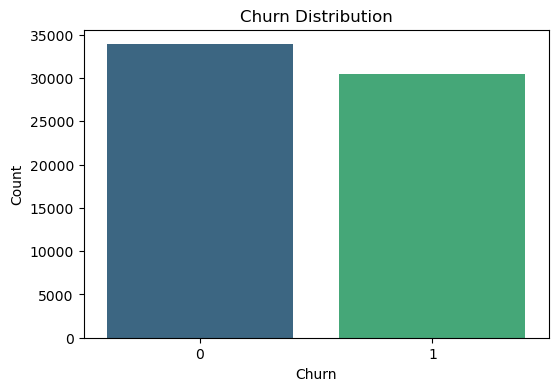

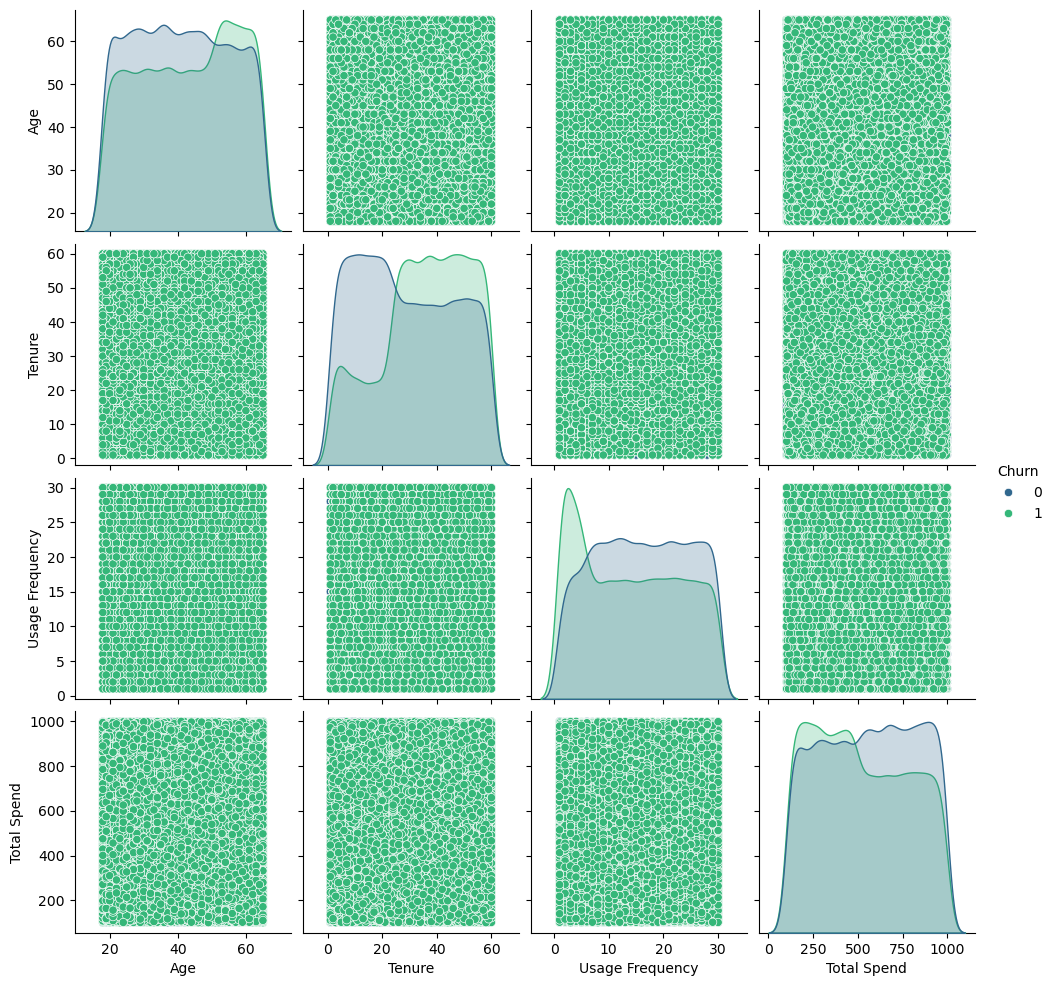

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(data.describe())

# Distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualizing relationships between numerical features and Churn
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend']
sns.pairplot(data[numerical_features + ['Churn']], hue='Churn', palette='viridis', diag_kind='kde')
plt.show()


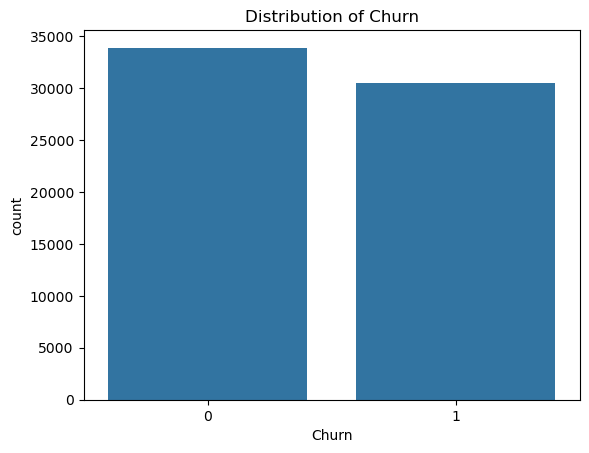

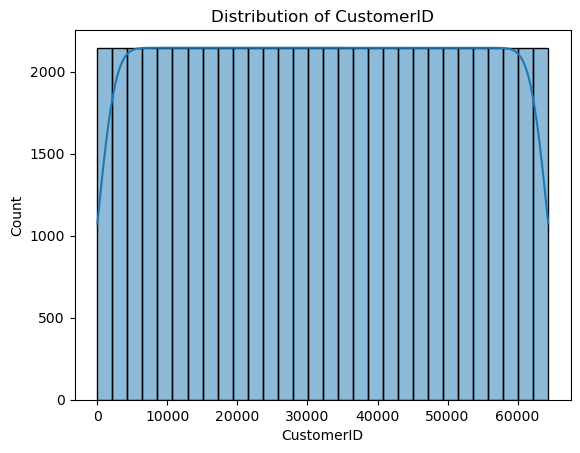

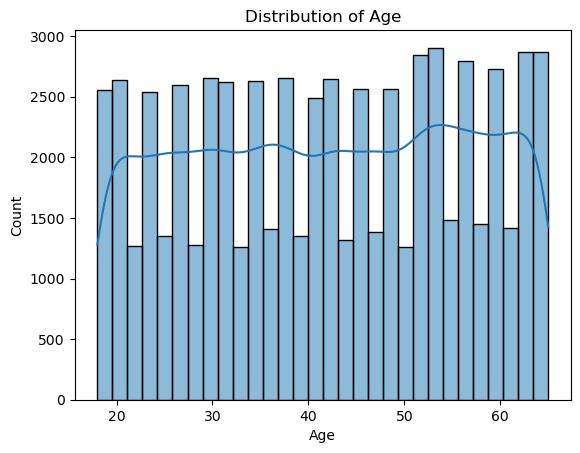

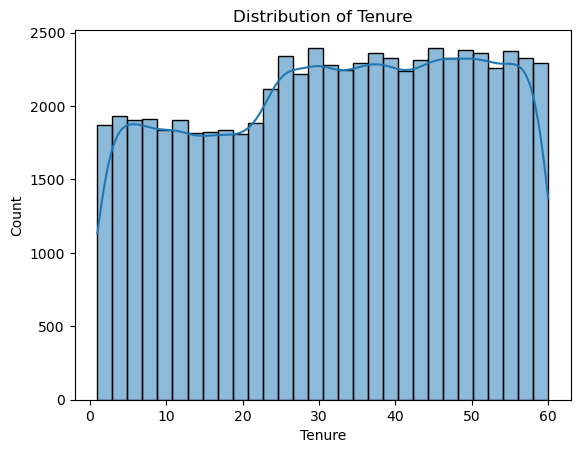

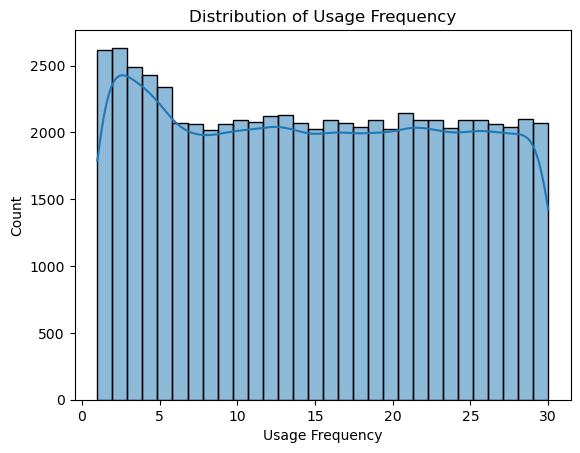

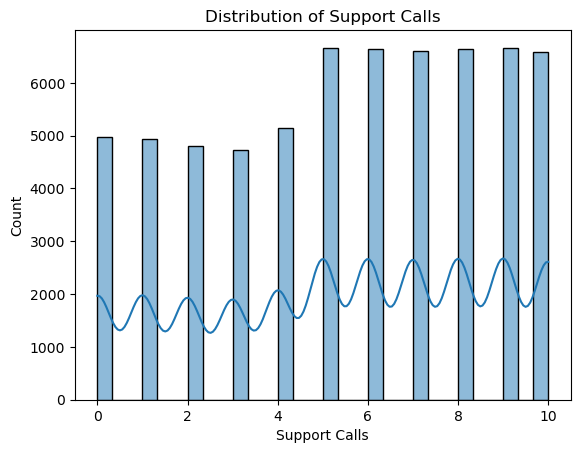

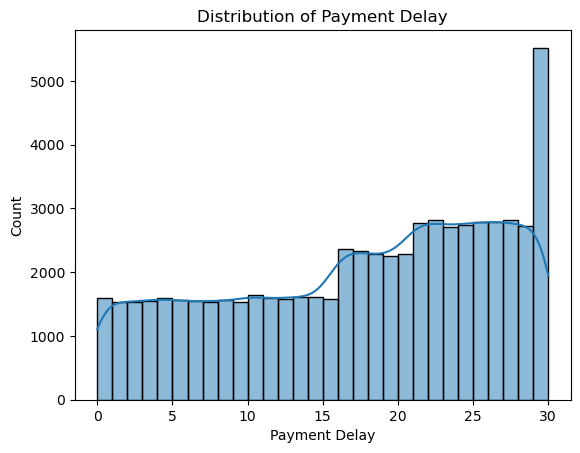

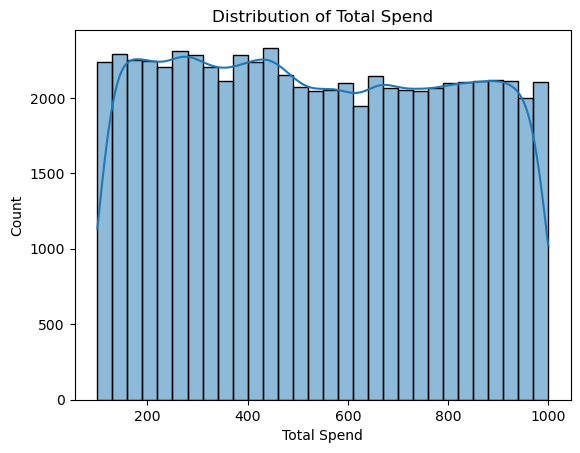

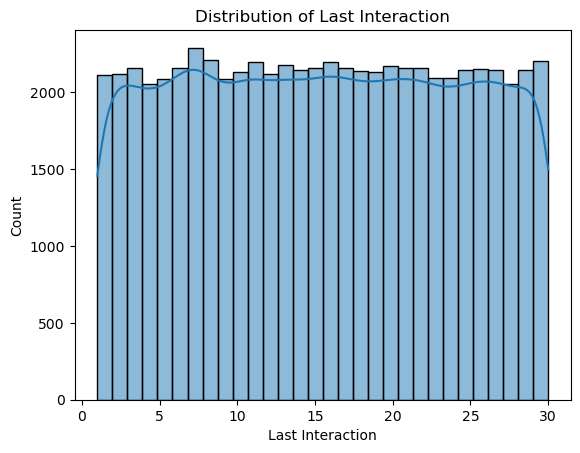

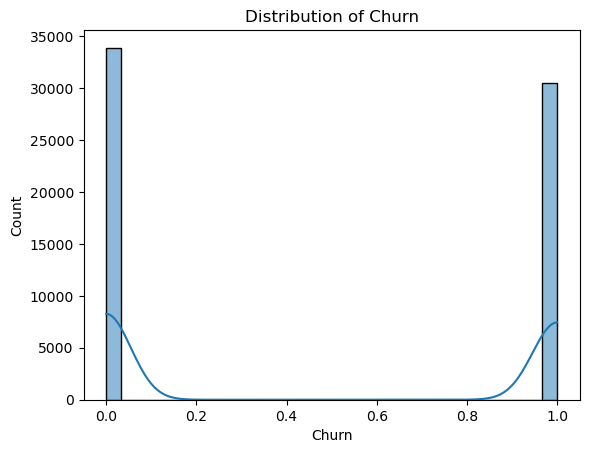

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable (Churn)
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Distribution of numerical variables
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


Handling Missing Values:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


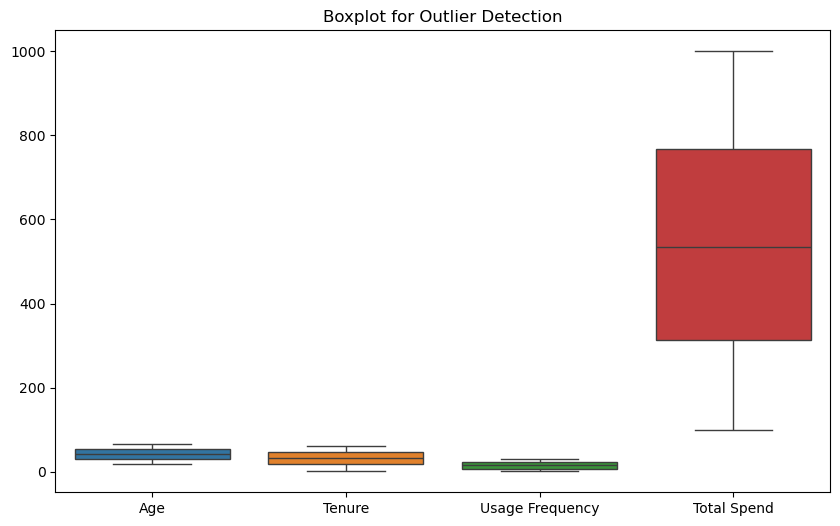

Data after removing outliers: (64374, 12)


In [15]:
# Handling missing values
print("\nHandling Missing Values:")
data = data.dropna()  # Drop rows with missing values (alternative: use .fillna())
print(data.isnull().sum())

# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Tenure', 'Usage Frequency', 'Total Spend']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data_no_outliers = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data after removing outliers:", data_no_outliers.shape)





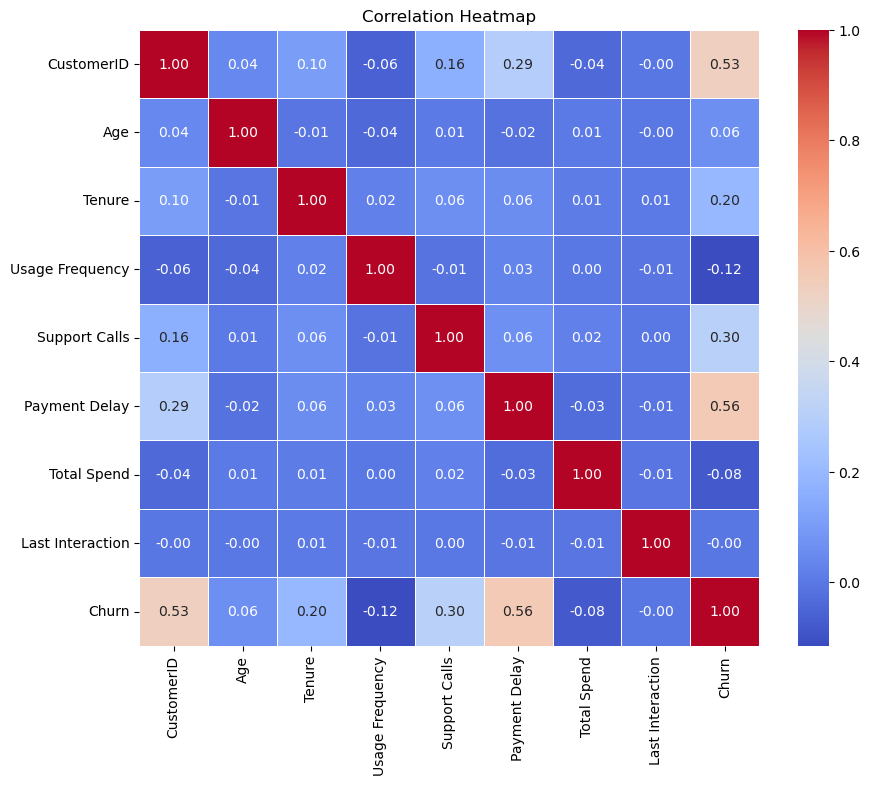

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix of numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
